In [2]:
import glob
import os
import sys

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

RES_DIR = "../sim_results/effects_of_homophily_on_misinformed"


In [3]:
daily_fname = glob.glob(os.path.join(RES_DIR, "daily*"))[0]
total_fname = glob.glob(os.path.join(RES_DIR, "total*"))[0]

daily_frame = pd.read_csv(daily_fname)
total_frame = pd.read_csv(total_fname)

In [4]:
total_frame

,alpha,beta,total_ord_inf,total_mis_inf,total
0,0.5,0.10,4.315917e-03,0.013812,0.018128
1,0.6,0.10,6.596884e-03,0.025596,0.032193
2,0.7,0.10,1.129555e-02,0.056926,0.068222
3,0.8,0.10,1.802207e-02,0.127884,0.145906
4,0.9,0.10,1.767428e-02,0.219244,0.236918
5,1.0,0.10,3.075084e-17,0.289426,0.289426
6,0.5,0.14,1.127013e-01,0.268656,0.381357
7,0.6,0.14,1.161747e-01,0.308519,0.424694
8,0.7,0.14,1.101026e-01,0.340651,0.450754
9,0.8,0.14,9.351865e-02,0.367856,0.461375


In [5]:
total_frame.head()

,alpha,beta,total_ord_inf,total_mis_inf,total
0,0.5,0.1,0.004316,0.013812,0.018128
1,0.6,0.1,0.006597,0.025596,0.032193
2,0.7,0.1,0.011296,0.056926,0.068222
3,0.8,0.1,0.018022,0.127884,0.145906
4,0.9,0.1,0.017674,0.219244,0.236918


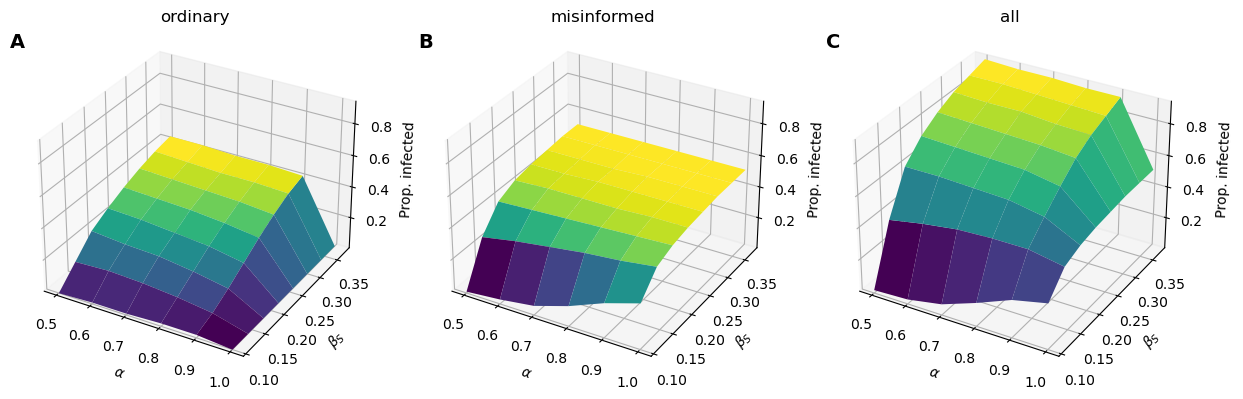

In [11]:
column_name_map = {
    "total_ord_inf" : "ordinary",
    "total_mis_inf" : "misinformed",
    "total" : "all"
}

fig = plt.figure(figsize=(12, 4))  # Adjust the figsize as needed
ax1 = fig.add_subplot(131, projection='3d')  # 1st subplot
ax2 = fig.add_subplot(132, projection='3d', sharez=ax1)  # 2nd subplot
ax3 = fig.add_subplot(133, projection='3d', sharez=ax1)  # 3rd subplot

column_ax_map = {
    "total_ord_inf" : ax1,
    "total_mis_inf" : ax2,
    "total" : ax3
}

for col in sorted(column_name_map.keys(), reverse=True):
    
    # Get our grid, based on the column
    reshaped_df = total_frame[
        ['alpha', 'beta', col]
    ].round(2).pivot( # Rounding ensures a cleaner plot
        index="alpha",
        columns="beta",
        values=col
    )
    
    # Select the proper axis to draw on and set labels
    temp_ax = column_ax_map[col]
    temp_ax.set_xlabel(r'$\alpha$')
    temp_ax.set_ylabel(r'$\beta_{S}$')
    temp_ax.set_zlabel("Prop. infected")
    temp_ax.set_title(column_name_map[col], pad=0)
    temp_ax.set_ylim((total_frame.beta.min(), total_frame.beta.max()))
    
    # Create a mesh grid of alpha and beta values
    alpha_values = reshaped_df.index.values
    beta_values = reshaped_df.columns.values
    alpha_mesh, beta_mesh = np.meshgrid(alpha_values, beta_values)

    # Get the corresponding values as a 2D array
    prop_infected_values = reshaped_df.values
    
    # Create the figure
    temp_ax.plot_surface(
        alpha_mesh,
        beta_mesh,
        prop_infected_values.T,
        cmap='viridis'
    )

plt.tight_layout()

plt.subplots_adjust(wspace=.15)

ax1.annotate(
    "A",
    xy=(0.0, .95),
    xycoords=ax1.transAxes,
    fontsize=14,
    fontweight="bold",
    ha="center",
    va="center",
)

ax2.annotate(
    "B",
    xy=(0.0, .95),
    xycoords=ax2.transAxes,
    fontsize=14,
    fontweight="bold",
    ha="center",
    va="center",
)

ax3.annotate(
    "C",
    xy=(0.0, .95),
    xycoords=ax3.transAxes,
    fontsize=14,
    fontweight="bold",
    ha="center",
    va="center",
)


plt.savefig("../figures/mf_homophiliy_misinformed_effect_3d.pdf", dpi=800, bbox_inches = "tight")
plt.savefig("../figures/mf_homophiliy_misinformed_effect_3d.png", dpi=800, bbox_inches = "tight")

In [18]:
total_frame.beta.max()

0.38

/var/folders/y9/5qn5vmv17gq4y8pznf1p8wb9s4pymq/T/ipykernel_5407/1358122159.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


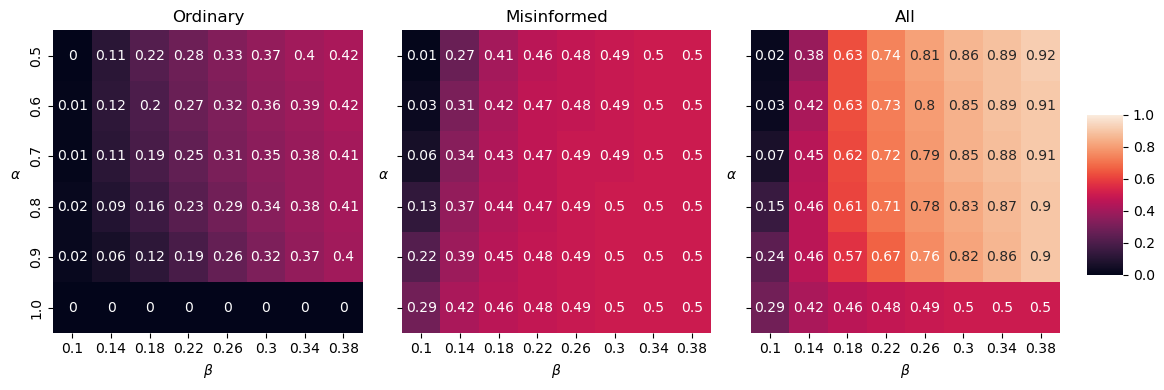

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4), sharex=True, sharey=True)

column_ax_map = {
    "total_ord_inf" : axes[0],
    "total_mis_inf" : axes[1],
    "total" : axes[2]
}

cbar_ax = fig.add_axes([.91, .3, .03, .4])

for idx, col in enumerate(sorted(column_name_map.keys(), reverse=True)):
    
    # Get our grid, based on the column
    reshaped_df = total_frame[
        ['alpha', 'beta', col]
    ].round(2).pivot( # Rounding ensures a cleaner plot
        index="alpha",
        columns="beta",
        values=col
    )
    
    # Select the proper axis to draw on and set labels
    temp_ax = column_ax_map[col]
    temp_ax.set_title(column_name_map[col])
    
    sns.heatmap(
        data = reshaped_df,
        ax = temp_ax,
        cbar = True,
        cbar_ax=cbar_ax,
        annot=True,
        vmin=0, vmax=1
    )
    
    temp_ax.set_ylabel(r"$\alpha$", rotation=0, labelpad=10)
    temp_ax.set_xlabel(r"$\beta$")
    

fig.tight_layout(rect=[0, 0, .9, 1])

plt.savefig("../figures/mf_homophiliy_misinformed_effect_heatmap.pdf", dpi=800)
plt.savefig("../figures/mf_homophiliy_misinformed_effect_heatmap.png", dpi=800)